In [56]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
data.Age.median()

28.0

In [59]:
data['Age'].fillna(28,inplace=True)

In [60]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

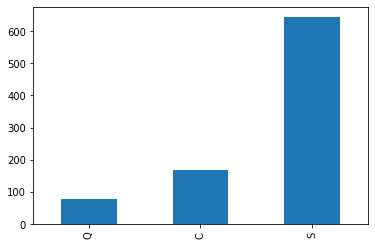

In [62]:
data.Embarked.value_counts().sort_values(ascending=True).plot.bar()

In [63]:
a = data.Embarked.mode()[0]
a

'S'

In [64]:
data['Embarked'].fillna(a,inplace=True)

In [65]:
data.Embarked.isnull().sum()

0

In [66]:
data.Cabin.isnull().sum()

687

In [67]:
data.Cabin.fillna('Missing',inplace=True)

In [68]:
data=data.drop(['Name','Ticket'],axis=1)

In [69]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,Missing,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,Missing,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,Missing,S


In [70]:
b=pd.get_dummies(data['Sex'])

In [71]:
b.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [72]:
c=pd.get_dummies(data['Embarked'])

In [73]:
data=pd.concat([data,b,c],axis=1)

In [74]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male,C,Q,S
0,1,0,3,male,22.0,1,0,7.2500,Missing,S,0,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C85,C,1,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,Missing,S,1,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,C123,S,1,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,Missing,S,0,1,0,0,1


In [75]:

data.Cabin = data.Cabin.astype(str).str[0]

In [76]:
data.Cabin.head()

0    M
1    C
2    M
3    C
4    M
Name: Cabin, dtype: object

In [77]:
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [78]:
D = data.Cabin.value_counts().sort_values(ascending=False).head(10).index
D

Index(['M', 'C', 'B', 'D', 'E', 'A', 'F', 'G', 'T'], dtype='object')

In [79]:
D=list(D)

In [80]:
D

['M', 'C', 'B', 'D', 'E', 'A', 'F', 'G', 'T']

In [81]:
import numpy as np

for i in D:
    data[i] = np.where(data['Cabin']==i,1,0)
    

In [82]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male,C,Q,S,M,B,D,E,A,F,G,T
0,1,0,3,male,22.0,1,0,7.2500,M,S,0,1,0,0,1,1,0,0,0,0,0,0,0
1,2,1,1,female,38.0,1,0,71.2833,C,C,1,0,1,0,0,0,0,0,0,0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,M,S,1,0,0,0,1,1,0,0,0,0,0,0,0
3,4,1,1,female,35.0,1,0,53.1000,C,S,1,0,1,0,1,0,0,0,0,0,0,0,0
4,5,0,3,male,35.0,0,0,8.0500,M,S,0,1,0,0,1,1,0,0,0,0,0,0,0


In [83]:
data=data.drop(['PassengerId','Sex','Cabin','Embarked'],axis=1)

In [84]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,M,B,D,E,A,F,G,T
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,1,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,1,0,1,0,1,0,0,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,1,0,0,0,0,0,0,0


In [85]:
X=data.drop(['Survived'],axis=1)
y=data['Survived']

In [86]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=42)

In [87]:
Xtrain.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,M,B,D,E,A,F,G,T
445,1,4.0,0,2,81.8583,0,1,0,0,1,0,0,0,0,1,0,0,0
650,3,28.0,0,0,7.8958,0,1,0,0,1,1,0,0,0,0,0,0,0
172,3,1.0,1,1,11.1333,1,0,0,0,1,1,0,0,0,0,0,0,0
450,2,36.0,1,2,27.7500,0,1,0,0,1,1,0,0,0,0,0,0,0
314,2,43.0,1,1,26.2500,0,1,0,0,1,1,0,0,0,0,0,0,0


In [88]:
ytrain.head()

445    1
650    0
172    1
450    0
314    0
Name: Survived, dtype: int64

In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)


In [90]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import ReLU,LeakyReLU,PReLU,ELU

In [91]:
ann = Sequential()

In [92]:
ann.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=18))
ann.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
ann.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))


In [93]:
ann.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])


In [94]:
reg = ann.fit(Xtrain,ytrain,validation_split=0.0,batch_size=20,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.8184 - accuracy: 0.3905
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7957 - accuracy: 0.4119
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7704 - accuracy: 0.4708
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7530 - accuracy: 0.5646
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7183 - accuracy: 0.6030
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7220 - accuracy: 0.5823
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7005 - accuracy: 0.6252
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7066 - accuracy: 0.5723
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5948
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.6303
Epoch 11/

In [95]:
ypred = ann.predict(Xtest)
ypred = ypred > 0.5

In [96]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [97]:
print(confusion_matrix(ytest,ypred))


[[138  19]
 [ 40  71]]


In [98]:
accuracy_score(ytest,ypred)

0.7798507462686567